In [1]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Poco popular = Valor 0 = [0, 57]
#Popular = Valor 1 = (57, 65]
#Super popular = Valor 3 = (65, 100]

df=pd.read_csv("../datasets/NormalizedSpotifyDataset_3.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration,popularity
1,0.0,-0.6553246374131798,0.32383262091312454,0.3698068373714516,3.2328780463718707,2.3278140552046094,0.5768088710878628,0.9470290108611626,-1.4242773523737737,0.9368145388724062,...,-0.5973707559570185,-0.5225143109685256,-0.6265447165894913,0.47309405318736575,0.08536660806090722,0.2585046185719715,-0.7583768064249115,-0.1987833411948581,0.0382764192998054,2
2,1.0,-0.6553246374131798,0.6400259640918348,0.3698068373714516,0.876533439841487,2.051966042700506,0.10616685999610039,-0.27808622849751236,0.5373037791357987,0.24173707526404314,...,-0.9607158338956964,-0.5296155544681974,0.23018019245521687,-1.5806110453505975,-1.274779931145266,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.3283068796236636,2
3,2.0,0.176584483135288,0.6400259640918348,0.3698068373714516,0.6939521683445347,1.7761180301964028,-0.4954785974820291,0.4679540963656807,-0.023147972724079095,0.6218060130259732,...,-0.9234293302644346,-0.5296325624214641,-0.3100343823668303,-0.060660774452957526,1.9585686751947569,0.2585046185719715,0.5366976406253775,-0.38148660879195084,-0.20226056824175237,2
4,3.0,-0.6553246374131798,0.6400259640918348,-1.5033639262839422,2.9093539795604815,1.6841686926950352,-0.3450672331124966,-0.5962504846891684,-0.303373848654018,0.20993269540271478,...,0.41809147059649177,-0.5296325624214641,0.23018019245521687,-1.4509253020723625,-0.4780392828837656,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.04346556810644652,2


In [2]:
df.columns = df.iloc[0]
df = df.drop(0)
df.columns = df.columns.fillna('to_drop')
df.drop('to_drop', axis = 1, inplace = True)
df.head()

,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration,popularity
1,-0.6553246374131798,0.32383262091312454,0.3698068373714516,3.2328780463718707,2.3278140552046094,0.5768088710878628,0.9470290108611626,-1.4242773523737737,0.9368145388724062,0.7454893895466356,...,-0.5973707559570185,-0.5225143109685256,-0.6265447165894913,0.47309405318736575,0.08536660806090722,0.2585046185719715,-0.7583768064249115,-0.1987833411948581,0.0382764192998054,2
2,-0.6553246374131798,0.6400259640918348,0.3698068373714516,0.876533439841487,2.051966042700506,0.10616685999610039,-0.27808622849751236,0.5373037791357987,0.24173707526404314,-1.3414007147816598,...,-0.9607158338956964,-0.5296155544681974,0.23018019245521687,-1.5806110453505975,-1.274779931145266,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.3283068796236636,2
3,0.176584483135288,0.6400259640918348,0.3698068373714516,0.6939521683445347,1.7761180301964028,-0.4954785974820291,0.4679540963656807,-0.023147972724079095,0.6218060130259732,-1.3414007147816598,...,-0.9234293302644346,-0.5296325624214641,-0.3100343823668303,-0.060660774452957526,1.9585686751947569,0.2585046185719715,0.5366976406253775,-0.38148660879195084,-0.20226056824175237,2
4,-0.6553246374131798,0.6400259640918348,-1.5033639262839422,2.9093539795604815,1.6841686926950352,-0.3450672331124966,-0.5962504846891684,-0.303373848654018,0.20993269540271478,0.7454893895466356,...,0.41809147059649177,-0.5296325624214641,0.23018019245521687,-1.4509253020723625,-0.4780392828837656,0.2585046185719715,-0.28744064386117,-0.016080073597765372,-0.04346556810644652,2
5,-0.6553246374131798,0.007639277734414316,0.3698068373714516,0.009941477758655596,1.3163713426895642,0.9795231692385467,0.2046457464139652,0.2570779032058598,0.4601447460959855,-1.3414007147816598,...,-0.7666144603826035,-0.5296325624214641,1.539161662216331,0.9943390020548691,0.3958657158910729,-5.303183858228962,-0.4444193647157505,-0.5641898763890435,-0.24145891386338766,2


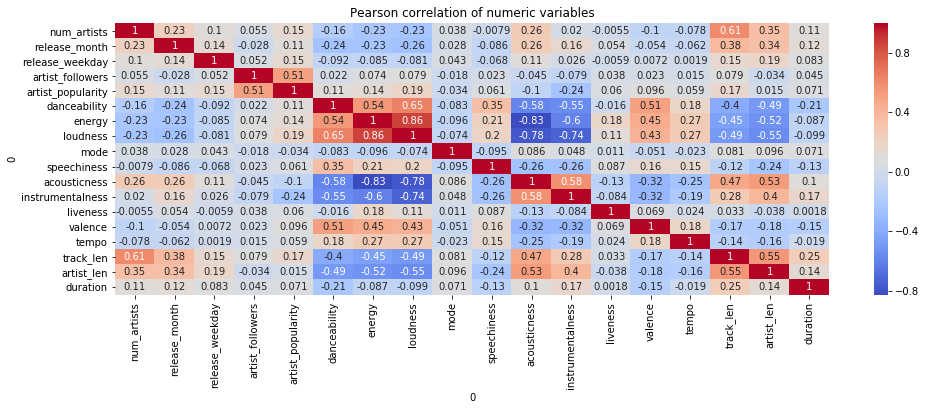

In [3]:
cols = df.columns
dd = df[cols].apply(pd.to_numeric, errors='coerce')
numeric = dd.drop(['popularity','key','time_signature'],axis=1)
plt.figure(figsize=(16,5))
sn.heatmap(numeric.corr(), cmap='coolwarm',annot=True).set_title('Pearson correlation of numeric variables')
plt.show()

In [4]:
#X = df.drop(['popularity', 'key', 'time_signature','danceability','energy','loudness','acousticness','instrumentalness','valence','track_len','artist_len','num_artists'],axis=1)  
X = df.drop(['popularity','key','time_signature'],axis=1)
y = df['popularity']
print(X.shape)
print(y.shape)

(8692, 18)
(8692,)


Accuracy: 0.60 (+/- 0.19)


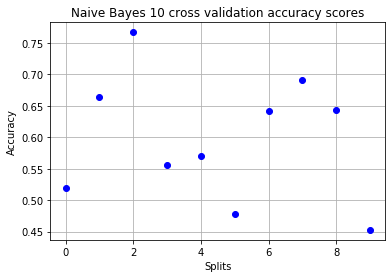

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=10, random_state=1) 

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

plt.plot(cv_scores,"bo")
plt.title('Naive Bayes 10 cross validation accuracy scores')
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.grid(True)

0.5981362172112287


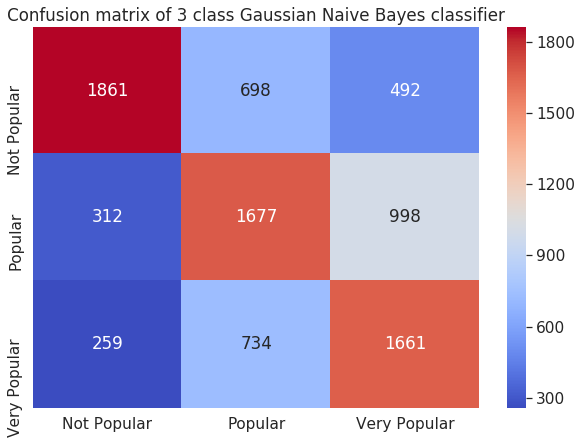

In [6]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)
print(accuracy_score(y, predicted))

df_cm = pd.DataFrame(confusion_matrix(y,predicted), ["Not Popular", "Popular", "Very Popular"],["Not Popular", "Popular", "Very Popular"])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, fmt='g', cmap='coolwarm',annot=True).set_title('Confusion matrix of 3 class Gaussian Naive Bayes classifier')

plt.show()

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      3051
           1       0.54      0.56      0.55      2987
           2       0.53      0.63      0.57      2654

    accuracy                           0.60      8692
   macro avg       0.61      0.60      0.60      8692
weighted avg       0.61      0.60      0.60      8692



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


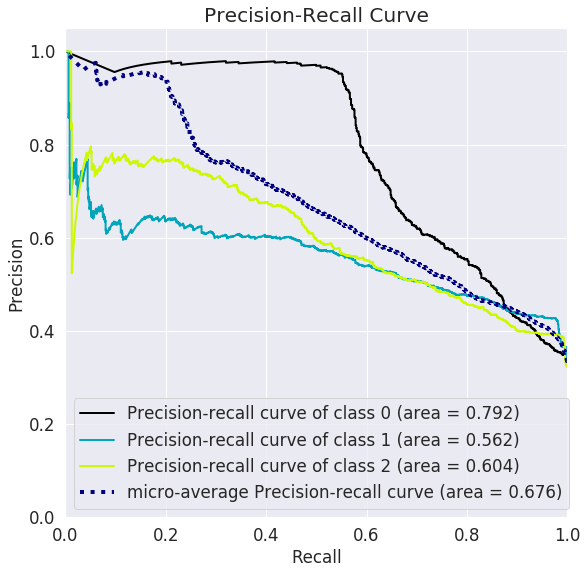

In [15]:
import scikitplot as skplt

clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
probas = clf.predict_proba(X_test)

skplt.metrics.plot_precision_recall_curve(y_test, probas,figsize = (9,9))